In [1]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
%matplotlib inline

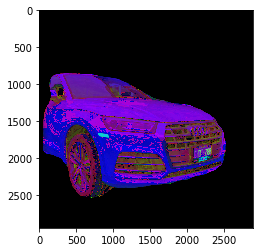

In [6]:
IMG_PATH = "t2/masked_car2.png"
ORI_IMG_PATH = "ori/c9.jpeg"
img = cv2.imread(IMG_PATH)
ori_img = cv2.imread(ORI_IMG_PATH)
ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)
img = cv2.GaussianBlur(img, (5, 5), 1, 1, cv2.BORDER_DEFAULT)
# plt.imshow(img)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
skimage.io.imsave("hsv1.png", hsv)
plt.imshow(hsv)

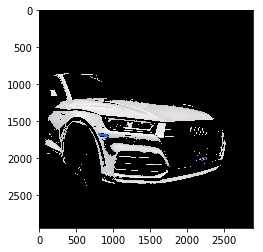

In [7]:
white_up = np.array([255, 255, 255])
white_low = np.array([0, 0, 200])
mask = cv2.inRange(hsv, white_low, white_up)
res = cv2.bitwise_and(img, img, mask=mask)
skimage.io.imsave("res1.png", res)
plt.imshow(res)

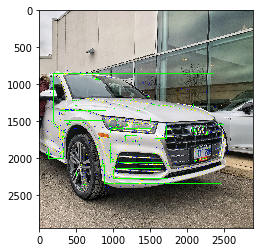

In [8]:
img_a = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_a,200,255,0)
image, contours, hier = cv2.findContours(thresh, cv2.RETR_LIST,
                cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    # draw a bounding rectangles
    cv2.rectangle(ori_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    rect = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(rect))
    cv2.drawContours(ori_img, [box], 0, (0, 0, 255))

cv2.drawContours(ori_img, contours, -1, (255, 255, 0), 1)
skimage.io.imsave("ori_img1.png", ori_img)
plt.imshow(ori_img)